In [1]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
tf.__version__

'2.3.0'

In [3]:
dataset=pd.read_csv(r'C:\Users\user\Music\Spark Foundation\task2\Iris.csv',index_col=0)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['Species']=le.fit_transform(dataset['Species'])

In [9]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [10]:
x=dataset.drop('Species',axis=1)
y=dataset['Species']

In [11]:
y=pd.get_dummies(y)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [13]:
y.shape

(150, 3)

In [14]:
input_layer=4
hidden_layer=50
output_size=y.shape[1]
ann=tf.keras.models.Sequential([
    tf.keras.layers.Dense(hidden_layer,activation='relu'),
    tf.keras.layers.Dense(hidden_layer,activation='relu'),
    tf.keras.layers.Dense(hidden_layer,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax'),
    ])

In [15]:
ann.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
Y_test=y_test.values
X_test=x_test.values

In [17]:
ann.fit(x_train.values,y_train.values,validation_data=(X_test,Y_test),batch_size=20,epochs=30,verbose=2)

Epoch 1/30
7/7 - 1s - loss: 1.0601 - accuracy: 0.5704 - val_loss: 0.9439 - val_accuracy: 0.9333
Epoch 2/30
7/7 - 0s - loss: 0.9288 - accuracy: 0.8889 - val_loss: 0.8140 - val_accuracy: 1.0000
Epoch 3/30
7/7 - 0s - loss: 0.8215 - accuracy: 0.9333 - val_loss: 0.6594 - val_accuracy: 0.9333
Epoch 4/30
7/7 - 0s - loss: 0.7316 - accuracy: 0.6667 - val_loss: 0.5229 - val_accuracy: 0.9333
Epoch 5/30
7/7 - 0s - loss: 0.6406 - accuracy: 0.8370 - val_loss: 0.4328 - val_accuracy: 1.0000
Epoch 6/30
7/7 - 0s - loss: 0.5632 - accuracy: 0.9704 - val_loss: 0.3472 - val_accuracy: 1.0000
Epoch 7/30
7/7 - 0s - loss: 0.5021 - accuracy: 0.8593 - val_loss: 0.2644 - val_accuracy: 0.9333
Epoch 8/30
7/7 - 0s - loss: 0.4375 - accuracy: 0.9556 - val_loss: 0.2284 - val_accuracy: 1.0000
Epoch 9/30
7/7 - 0s - loss: 0.3832 - accuracy: 0.9704 - val_loss: 0.1946 - val_accuracy: 1.0000
Epoch 10/30
7/7 - 0s - loss: 0.3429 - accuracy: 0.9481 - val_loss: 0.1591 - val_accuracy: 1.0000
Epoch 11/30
7/7 - 0s - loss: 0.2979 - a

In [18]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                250       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 153       
Total params: 5,503
Trainable params: 5,503
Non-trainable params: 0
_________________________________________________________________


In [19]:
predictions=ann.predict(X_test)

In [20]:
import numpy as np

In [21]:
predict=np.argmax(predictions,1)
predict

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1], dtype=int64)

In [22]:
y_testing=np.argmax(Y_test,1)

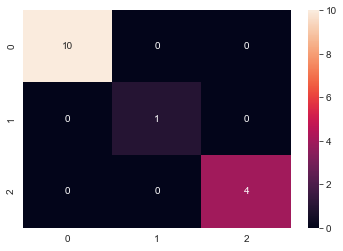

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(predict,y_testing)
sns.heatmap(cm,annot=True)


In [25]:
from sklearn.metrics import classification_report
print(classification_report(predict,y_testing))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

